In [191]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# 1.Phase 1 data cleansing and crawling

## 1.1 Data cleanup; Filter out information from all US journalists

In [1]:
import pandas as pd
df = pd.read_csv('Data_Journalism.csv')# 还是需要美国的

In [14]:
# 清理出所有的美国的信息，去掉其他的 并写成DataFrame
for i in df['Location']:
    if 'United States' not in i:
        number = df[df['Location'] == i]['Unnamed: 0'].tolist()[0] # 运用index定位
        df.drop([number], inplace=True)
df['Twitter'] #46条美国推特网址

In [ ]:
# 第二种方法 筛选所有美国记者的推特网址46条 ps：仅供参考！
T_list =[]
for i in df['Location'].tolist():
    if 'United States' in i:
        T = df[df['Location'] == '{}'.format(i)]['Twitter'].tolist()
        T_list.extend(T)
T_list 

## 1.2 Crawling Twitter text more than 4,000 tweets

In [65]:
# 爬取单人的并封装函数
from selenium import webdriver
import time
browser = webdriver.Chrome() 
browser.get('http://www.twitter.com/smelendez')

# 翻页五次 每人100条推特信息 
def T_scraper(i):
    browser.get(i)
    for i in range(5):
        time.sleep(1)
        browser.execute_script("window.scrollTo(0,100000);")# 不管翻页多大也只是往下拉 每次最多多拿20个elments
        time.sleep(0.5)

    element = browser.find_elements_by_css_selector('.TweetTextSize.TweetTextSize--normal') 
    global All_T_text
    All_T_text = []
    for i in element:
        T_text = i.text # 直接这里用split的话 后面没办法保留需要的词
        
        All_T_text.append(T_text)
    
    return All_T_text

In [67]:
# 爬取46条网址并全部切割以后放入All_words
from selenium.common.exceptions import WebDriverException

browser = webdriver.Chrome() 
All_words = []
for i in T_list:
    try:
        T_scraper(i)
        All_words.extend(All_T_text)
    except WebDriverException:
        print(i)
# 把所有words写进txt
f = open('test.txt','w')
for i in All_words:
    f.write(i)

# 2. Phase 2 statistical word frequency

## 2.1 Text processing

In [56]:
# 去词并封装函数
def stop_words(words):
    word_list = []
    with open ('stopword.txt','r') as s:
        list_stop_words = s.read().split()
    for i in words:
        if i not in list_stop_words:
            word_list.append(i)
    return word_list

# 定义函数去除多余字符
def getText(txt): 
    text=open(txt,"r").read() 
    text=text.lower()                 
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>':
        text=text.replace(ch," ")  
    return text

## 2.2 statistics of word frequency 

In [25]:
import matplotlib.pyplot as plt                          
from PIL import Image
from scipy.misc import imread 
import pandas as pd 
import numpy as np 
import seaborn as sns
import jieba
import wordcloud
from pylab import mpl 
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

In [23]:
# TOP20 words
def word_count(word_list):
    word_count = pd.Series(word_list).value_counts().sort_values(ascending=False)[0:15]  
    fig = plt.figure(figsize=(16,8))  
    x = word_count.index.tolist()  
    y = word_count.values.tolist()  
    sns.barplot(x, y, palette="Blues_r")   
    plt.title('Top20 Words')  
    plt.ylabel('Count')  
    sns.despine(bottom=True)   
    plt.show()
    
# All words 
def cloud_words(i):
    image = Image.open('Python.png')
    graph = np.array(image)
    wc = WordCloud(mode='RGBA',background_color='white',max_words=2000,max_font_size=300,random_state=42,mask=graph)
    wc.generate(' '.join(word_list))
    img = imread('Python.png')  
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))
    cloud_colors.default_color = [0.6,0.6,0.6]
    wc.recolor(color_func=cloud_colors)
    plt.figure(figsize=(12,12))
    plt.imshow(wc.recolor(color_func=cloud_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title('Twitter', loc='Center', fontsize=20)
    plt.show()

# What are the most frequent words in these tweets?

After the statistics, it was found that the frequency of "data" is the highest, which is reasonable, because the crawling tweets are all from data journalists. At the same time, by analyzing other words, such as Trump, elections, public, etc., it can be observed that data journalists are very concerned about politics.

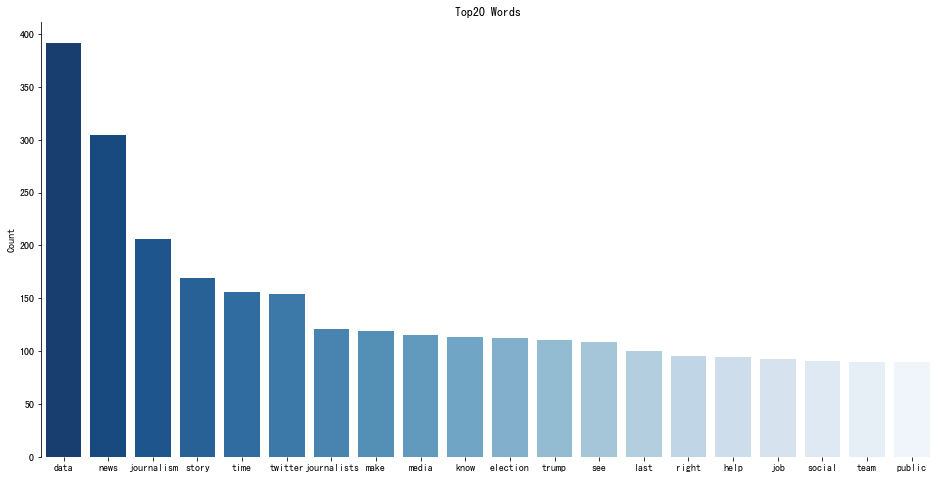

In [182]:
test=getText('test.txt')  
words =test.split() 
word_list = stop_words(words)
word_count(word_list)
# data就不说了 通过其他的词应该可以看出来 这些记者对于政治的关注度非常高 election; trump; public, etc.

# What is the frequency of other words in the tweet text, what can we find out from them?

We originally wanted to look for words like "coding" and "programming", but it is clear that it is difficult to find them in the picture below. Does this mean that programming is not important in data journalism? We may need to distinguish two words “data” and “programming”. Those are similar but different concepts.

/Users/lichenxi/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


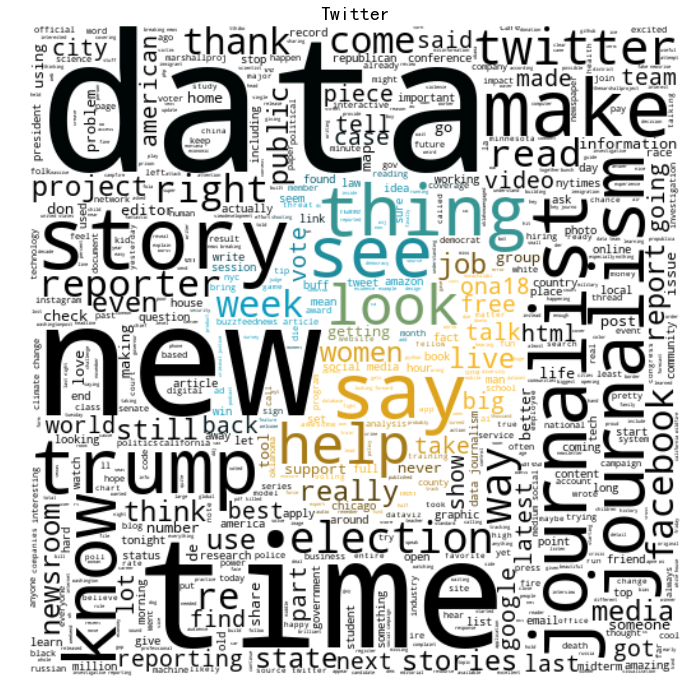

In [190]:
cloud_words(i) # 弄出来风格奇特的词云图 好像还行

In [2]:
import pandas as pd

In [38]:
# 文本处理
dfs_all_word =[]
for i in dfs["Description"]:
    dfs_all_word.append(i)

f = open('dfs.txt','w')
for i in dfs_all_word:
    f.write(i)

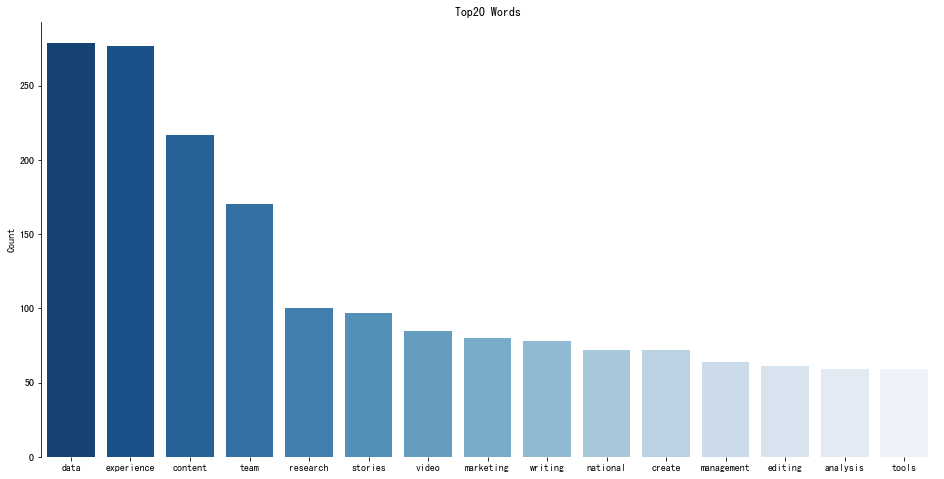

In [86]:
test=getText('dfs.txt')  
words =test.split() 
word_list = stop_words(words)
word_count(word_list)

/Users/lichenxi/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


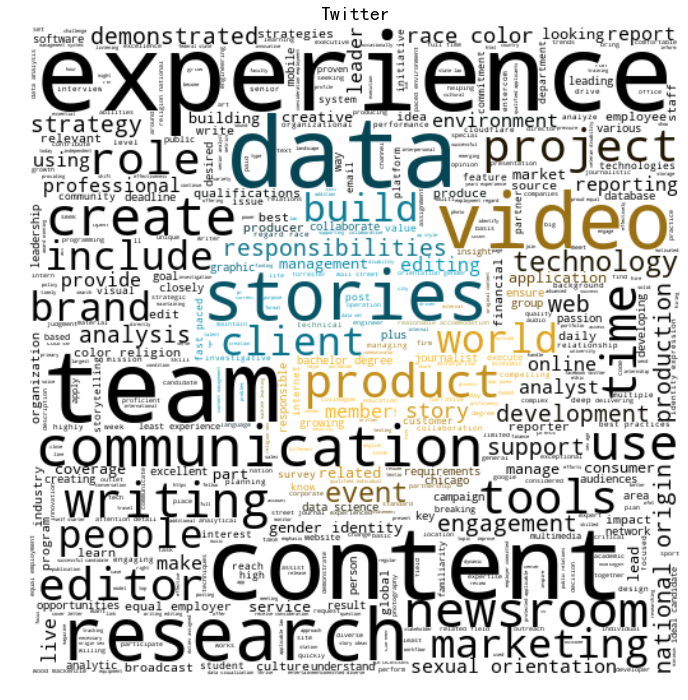

In [89]:
cloud_words(i) 